In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/naive-bayes-project-tutorial/main/playstore_reviews.csv")
df.head()

,package_name,review,polarity
0,com.facebook.katana,privacy at least put some option appear offli...,0
1,com.facebook.katana,"messenger issues ever since the last update, ...",0
2,com.facebook.katana,profile any time my wife or anybody has more ...,0
3,com.facebook.katana,the new features suck for those of us who don...,0
4,com.facebook.katana,forced reload on uploading pic on replying co...,0


In [3]:
df.shape

(891, 3)

In [4]:
df= df.drop("package_name", axis = 1)

In [5]:
df.head()

,review,polarity
0,privacy at least put some option appear offli...,0
1,"messenger issues ever since the last update, ...",0
2,profile any time my wife or anybody has more ...,0
3,the new features suck for those of us who don...,0
4,forced reload on uploading pic on replying co...,0


In [6]:
polarity= df['polarity'].value_counts()
import matplotlib.pyplot as plt

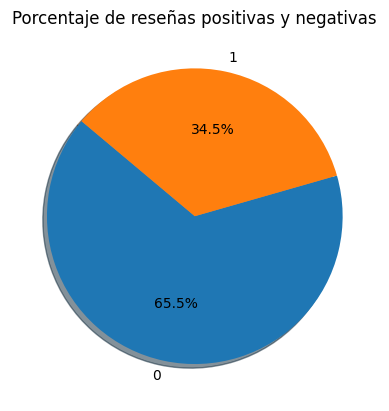

In [7]:
plt.pie(
    polarity, labels=polarity.index,
    autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Porcentaje de reseñas positivas y negativas")
plt.show()

In [8]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 26.0.1
[notice] To update, run: pip install --upgrade pip


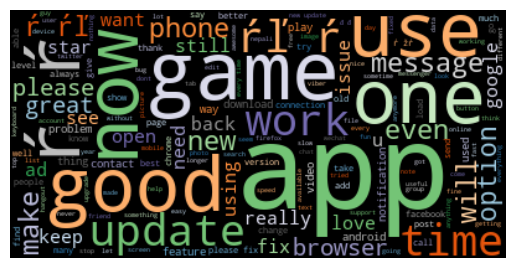

In [9]:
from wordcloud import WordCloud

txt = " ".join(str(coments).lower() for coments in df["review"])
wordcloud = WordCloud(colormap='tab20c').generate(txt)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [10]:
df["review"] = df["review"].str.strip().str.lower()

In [11]:
from sklearn.model_selection import train_test_split

In [13]:
y= "polarity"
X, y =df.drop(columns='polarity'), df[y]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
X_train.head()

,review
636,bug whenever i search anything it opens google...
496,everyone loves slack. count me among them
834,well done nicely designed .....this app had co...
88,"better user interface, worse quality the user ..."
468,still broadcast list didn't improved you shoul...


In [14]:
from sklearn.feature_extraction.text import CountVectorizer

vec_model = CountVectorizer(stop_words = "english")
X_train = vec_model.fit_transform(X_train).toarray()
X_test = vec_model.transform(X_test).toarray()

X_train

array([[1]])

In [16]:
X_test

array([[1]])

In [18]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [1, 712]